## QR decomposition

### Orthogonal matrices
The letter Q is often used to indicate orthogonal matrices\
Orthogonal matrices have two properties:
- orthogonal columns: all columns are pair-wise orthogonal
- unit-norm columns: the norm (geometric length) of each column is exactly 1

That means that the dot product of a column with itself is equal to 1, and the dot product of a column with another column is 0

The matrix equation expressing the two key properties of an orthogonal matrix is simply marvelous:

Q<sup>T</sup>Q = I

This is a big deal, because a matrix that multiply another matrix giving as a result the identity matrix is the definition of inverse! That means that the inverse of an orthogonal matrix is its transpose.

Examples of orthogonal matrices are: the identity matrix itself, the rotation matrix, permutation matrices, and a lot of others, as long as they have the two properties previously mentioned

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def roundAbs(matrix):
    return np.abs(np.rint(matrix))

def print_matrix(matrix, title='Matrix as Image'):
    fig, ax = plt.subplots(figsize=(4,4))
    plt.imshow(matrix, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

def print_matrices(matrices, titles=[]):
    if len(titles)==0:
        for i in range(len(matrices)):
            print_matrix(matrices[i])
    else:
        for i in range(len(matrices)):
            print_matrix(matrices[i], titles[i])        

In [3]:
rot_90 = np.array([[0,-1], [1,0]])
rot_180 = np.array([[-1,0],[0,-1]])
rot_270 = np.array([[0,1],[-1,0]])

row_perm = np.array([[0,0,1,0],[0,1,0,0],[0,0,0,1],[1,0,0,0]])
col_perm = np.array([[0,0,0,1],[0,1,0,0],[1,0,0,0],[0,0,1,0]])

print(rot_90.T@rot_90)
print(rot_180.T@rot_180)
print(rot_270@rot_270.T)

print(row_perm.T@row_perm)
print(col_perm.T@col_perm)

ʎ = 1 / np.sqrt(2)
A = ʎ * np.array([[1,-1],[1,1]])
print(A)
print(roundAbs(A.T@A))

ʎ = 1 / 3
A = ʎ * np.array([[1,2,2],[2,1,-2],[-2,2,1]])
print(roundAbs(A.T@A))

[[1 0]
 [0 1]]
[[1 0]
 [0 1]]
[[1 0]
 [0 1]]
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[1. 0.]
 [0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Gram-Schmidt and QR decomposition
An orthogonal matrix can be created from an non-orthogonal matrix via QR decomposition.

QR decomposition is a more sophisticated and stable version of Gram-Schmidt decomposition. To help visualize what QR decomposition is, let's implement a GS decomposition algorithm, which will be conceptually equal to a QR decomposition.

The algorithm is :
- orthogonalize all V<inf>k</inf> to all previous columsn in matrix Q using orthogonal vector decomposition (the perpendicular component)
- normalize V<sup>*</sup><inf>k</inf> to unit length


In [4]:
M = np.array([[1,2,3],[4,5,6],[7,8,9]])
Q = np.zeros(A.shape)

def normalize(v):
    return v / np.linalg.norm(v)

for col in range(Q.shape[0]):
    # initialize
    Q[:,col] = M[:,col]
    
    # orthogonalize
    t = M[:,col] # target
    for j in range(col): # only to earlier cols
        r = Q[:,j] # reference
        ## find the vertical projection β of T on R
        β = t.dot(r) / r.dot(r)
        ## find the parallel component of the target vector T with reference on R
        parallel = β * r
        ## find perpendicular component
        perpendicular = Q[:,col]-parallel
        Q[:,col]=perpendicular

    Q[:,col] = normalize(Q[:,col])   

print('Q decomposition with Gram-Schmidt method')
print(Q)

print('Q decomposition with numpy:')
Q,R = np.linalg.qr(M)
print(Q)    

Q decomposition with Gram-Schmidt method
[[ 0.12309149  0.90453403  0.91337145]
 [ 0.49236596  0.30151134  0.39497144]
 [ 0.86164044 -0.30151134 -0.09874286]]
Q decomposition with numpy:
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]


### the R matrix

As Q is different from the original matrix, to not loose information about M, we can store in a matrix the transformation that would recreate the original matrix, so that:

M = QR

Q<sup>T</sup>M = Q<sup>T</sup>QR

Q<sup>T</sup>M = R

The R matrix is always upper-triangular

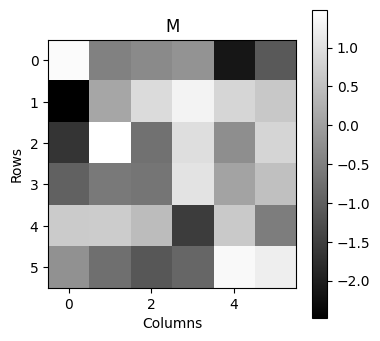

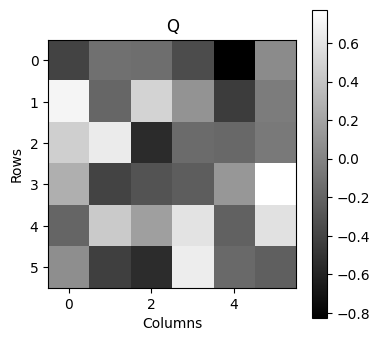

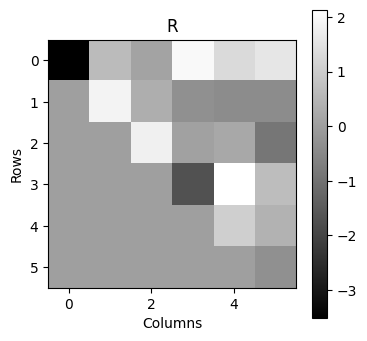

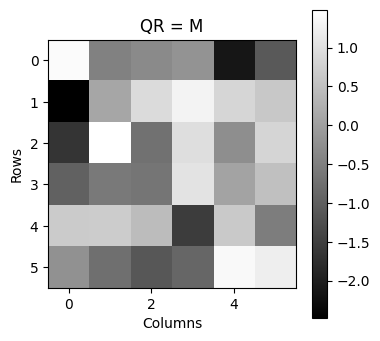

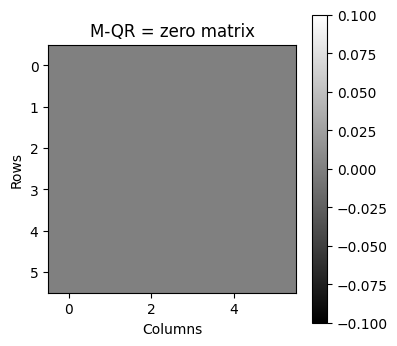

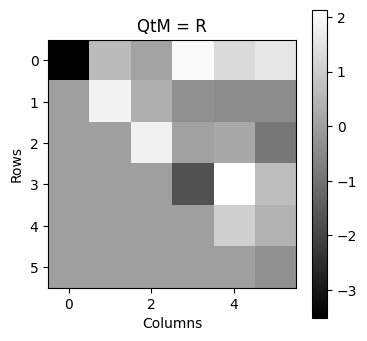

In [5]:
M = np.random.randn(6,6)
Q,R = np.linalg.qr(M)
QR = Q@R
diff = roundAbs(M - QR)
QtM = Q.T@M

print_matrices([M,Q,R, QR, diff, QtM],['M','Q','R', 'QR = M', 'M-QR = zero matrix', 'QtM = R'])

### Sizes of Q and R

There are two types of QR decompositions that could be used for a "tall" matrix (rows > columns):
- economy (ou reduced): give a tall Q matrix
- full (or complete): give a squared Q 

The rank of Q is always the maximum possible rank, which is the number of rows for full squared Q, and the number of columns for reduced Q
The rank of R is always the same size of M

QR decomposition is not unique for all matrices sizes and ranks. It is possible to obtain M = Q<sub>1</sub>R<sub>1</sub> and M = Q<sub>2</sub>R<sub>2</sub>

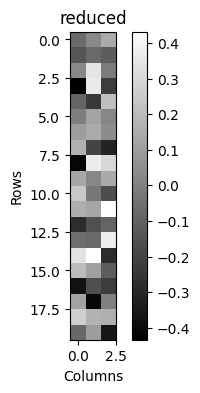

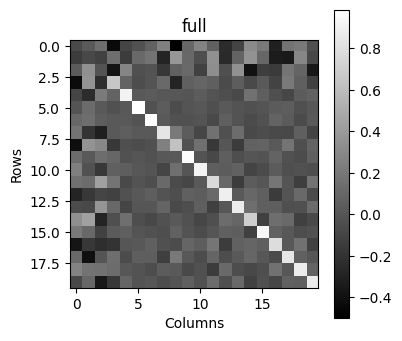

In [6]:
M = np.random.randn(20,3)

Q,R = np.linalg.qr(M, 'reduced')
print_matrix(Q, 'reduced')

Q,R = np.linalg.qr(M, 'complete')
print_matrix(Q, 'full')

### Other notes on QR decomposition

QR decomposition provides a more stable way of computing inverses

A = QR

A<sup>-1</sup>= (QR)<sup>-1</sup>

A<sup>-1</sup>= Q<sup>-1</sup>R<sup>-1</sup>

A<sup>-1</sup>= R<sup>-1</sup>Q<sup>T</sup>

As R is upper triangular, using back propagation, the inversion is numerically stable. Though, matrices that are theoritically invertible, but close to singular matrices, are difficult to invert. QR is stable, but it is not guarantee that the result is a high-quality inverse